In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import re
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
data_path_nadp = "data/exp1-nadp-wb/nadp_wb.csv"
data_path_adp_ctr = "data/exp1-adp-wb-ctr/adp_change_time_report_wb.csv";
data_path_adp_dm = "data/exp1-adp-wb-dm/adp_disable_metrics_wb.csv";
data_path_adp_combined = "data/exp1-adp-wb-dm-ctr/adp_disable_metrics_change_time_report_wb.csv";
follower_id_adp_ctr = "9aeedfd9df1f"
follower_id_adp_dm = "18c16bcb0442"
follower_id_adp_combined = "533421acb9ff"
follower_id_nadp = "fb0e2dc64e78"
day = "gio"
cpu_limit = 5

In [3]:
data_adp_ctr = pd.read_csv(data_path_adp_ctr, delim_whitespace=True, header=None)
data_adp_dm = pd.read_csv(data_path_adp_dm, delim_whitespace=True, header=None)
data_adp_combined = pd.read_csv(data_path_adp_combined, delim_whitespace=True, header=None)
data_nadp = pd.read_csv(data_path_nadp, delim_whitespace=True, header=None)

In [4]:
#nadp#

ts_temp_nadp = pd.DataFrame()
ts_temp_nadp[0] = (data_nadp[data_nadp[0] == day][0]).astype(str).str.replace('gio', 'Thu')
ts_temp_nadp[1] = (data_nadp[data_nadp[0] == day][1]).astype(str)
ts_temp_nadp[2] = (data_nadp[data_nadp[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_nadp[3] = (data_nadp[data_nadp[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_nadp[4] = (data_nadp[data_nadp[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_nadp[5] = (data_nadp[data_nadp[0] == day][5]).astype(str)

ts_nadp = pd.DataFrame(columns=["timestamp"])
ts_nadp["timestamp"] = pd.to_datetime(ts_temp_nadp[0] + " " + ts_temp_nadp[1] + " " + ts_temp_nadp[2] + " " + ts_temp_nadp[3] + " " + ts_temp_nadp[4] + " " + ts_temp_nadp[5])

# adp ctr #

ts_temp_adp_ctr = pd.DataFrame()
ts_temp_adp_ctr[0] = (data_adp_ctr[data_adp_ctr[0] == day][0]).astype(str).str.replace('gio', 'Thu')
ts_temp_adp_ctr[1] = (data_adp_ctr[data_adp_ctr[0] == day][1]).astype(str)
ts_temp_adp_ctr[2] = (data_adp_ctr[data_adp_ctr[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_adp_ctr[3] = (data_adp_ctr[data_adp_ctr[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_adp_ctr[4] = (data_adp_ctr[data_adp_ctr[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_adp_ctr[5] = (data_adp_ctr[data_adp_ctr[0] == day][5]).astype(str)

ts_adp_ctr = pd.DataFrame(columns=["timestamp"])
ts_adp_ctr["timestamp"] = pd.to_datetime(ts_temp_adp_ctr[0] + " " + ts_temp_adp_ctr[1] + " " + ts_temp_adp_ctr[2] + " " + ts_temp_adp_ctr[3] + " " + ts_temp_adp_ctr[4] + " " + ts_temp_adp_ctr[5])

# adp dm #

ts_temp_adp_dm = pd.DataFrame()
ts_temp_adp_dm[0] = (data_adp_dm[data_adp_dm[0] == day][0]).astype(str).str.replace('gio', 'Thu')
ts_temp_adp_dm[1] = (data_adp_dm[data_adp_dm[0] == day][1]).astype(str)
ts_temp_adp_dm[2] = (data_adp_dm[data_adp_dm[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_adp_dm[3] = (data_adp_dm[data_adp_dm[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_adp_dm[4] = (data_adp_dm[data_adp_dm[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_adp_dm[5] = (data_adp_dm[data_adp_dm[0] == day][5]).astype(str)

ts_adp_dm = pd.DataFrame(columns=["timestamp"])
ts_adp_dm["timestamp"] = pd.to_datetime(ts_temp_adp_dm[0] + " " + ts_temp_adp_dm[1] + " " + ts_temp_adp_dm[2] + " " + ts_temp_adp_dm[3] + " " + ts_temp_adp_dm[4] + " " + ts_temp_adp_dm[5])

# adp combined #

ts_temp_adp_combined = pd.DataFrame()
ts_temp_adp_combined[0] = (data_adp_combined[data_adp_combined[0] == day][0]).astype(str).str.replace('gio', 'Thu')
ts_temp_adp_combined[1] = (data_adp_combined[data_adp_combined[0] == day][1]).astype(str)
ts_temp_adp_combined[2] = (data_adp_combined[data_adp_combined[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_adp_combined[3] = (data_adp_combined[data_adp_combined[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_adp_combined[4] = (data_adp_combined[data_adp_combined[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_adp_combined[5] = (data_adp_combined[data_adp_combined[0] == day][5]).astype(str)

ts_adp_combined = pd.DataFrame(columns=["timestamp"])
ts_adp_combined["timestamp"] = pd.to_datetime(ts_temp_adp_combined[0] + " " + ts_temp_adp_combined[1] + " " + ts_temp_adp_combined[2] + " " + ts_temp_adp_combined[3] + " " + ts_temp_adp_combined[4] + " " + ts_temp_adp_combined[5])

In [5]:
# nadp #
df_nadp = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_nadp["ID"] = data_nadp[data_nadp[0] == follower_id_nadp][0]
df_nadp["Name"] = data_nadp[data_nadp[0] == follower_id_nadp][1]
df_nadp["CPU%"] = data_nadp[data_nadp[0] == follower_id_nadp][2]
df_nadp["MEM_USAGE"] = data_nadp[data_nadp[0] == follower_id_nadp][3]
df_nadp["MEM_LIMIT"] = data_nadp[data_nadp[0] == follower_id_nadp][5]
df_nadp["MEM%"] = data_nadp[data_nadp[0] == follower_id_nadp][6]
df_nadp["NET_I"] = data_nadp[data_nadp[0] == follower_id_nadp][7]
df_nadp["NET_O"] = data_nadp[data_nadp[0] == follower_id_nadp][9]
df_nadp["BLOCK_I"] = data_nadp[data_nadp[0] == follower_id_nadp][10]
df_nadp["BLOCK_O"] = data_nadp[data_nadp[0] == follower_id_nadp][12]
df_nadp["PIDs"] = data_nadp[data_nadp[0] == follower_id_nadp][13]

# adp ctr #

df_adp_ctr = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_adp_ctr["ID"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][0]
df_adp_ctr["Name"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][1]
df_adp_ctr["CPU%"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][2]
df_adp_ctr["MEM_USAGE"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][3]
df_adp_ctr["MEM_LIMIT"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][5]
df_adp_ctr["MEM%"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][6]
df_adp_ctr["NET_I"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][7]
df_adp_ctr["NET_O"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][9]
df_adp_ctr["BLOCK_I"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][10]
df_adp_ctr["BLOCK_O"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][12]
df_adp_ctr["PIDs"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][13]

# adp dm #

df_adp_dm = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_adp_dm["ID"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][0]
df_adp_dm["Name"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][1]
df_adp_dm["CPU%"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][2]
df_adp_dm["MEM_USAGE"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][3]
df_adp_dm["MEM_LIMIT"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][5]
df_adp_dm["MEM%"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][6]
df_adp_dm["NET_I"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][7]
df_adp_dm["NET_O"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][9]
df_adp_dm["BLOCK_I"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][10]
df_adp_dm["BLOCK_O"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][12]
df_adp_dm["PIDs"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][13]

# adp combined#

df_adp_combined = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_adp_combined["ID"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][0]
df_adp_combined["Name"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][1]
df_adp_combined["CPU%"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][2]
df_adp_combined["MEM_USAGE"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][3]
df_adp_combined["MEM_LIMIT"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][5]
df_adp_combined["MEM%"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][6]
df_adp_combined["NET_I"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][7]
df_adp_combined["NET_O"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][9]
df_adp_combined["BLOCK_I"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][10]
df_adp_combined["BLOCK_O"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][12]
df_adp_combined["PIDs"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][13]

In [6]:
# reset index #
df_adp_ctr.reset_index(drop=True, inplace=True)
df_adp_dm.reset_index(drop=True, inplace=True)
df_adp_combined.reset_index(drop=True, inplace=True)
df_nadp.reset_index(drop=True, inplace=True)
ts_adp_ctr.reset_index(drop=True, inplace=True)
ts_adp_dm.reset_index(drop=True, inplace=True)
ts_adp_combined.reset_index(drop=True, inplace=True)
ts_nadp.reset_index(drop=True, inplace=True)

In [7]:
df_adp_ctr["timestamp"] = ts_adp_ctr["timestamp"]
df_adp_dm["timestamp"] = ts_adp_dm["timestamp"]
df_adp_combined["timestamp"] = ts_adp_combined["timestamp"]
df_nadp["timestamp"] = ts_nadp["timestamp"]

df_adp_ctr = df_adp_ctr[df_adp_ctr["timestamp"] < df_adp_ctr["timestamp"][0] + pd.to_timedelta(1801, unit='s')]
df_adp_dm = df_adp_dm[df_adp_dm["timestamp"] < df_adp_dm["timestamp"][0] + pd.to_timedelta(1801, unit='s')]
df_adp_combined = df_adp_combined[df_adp_combined["timestamp"] < df_adp_combined["timestamp"][0] + pd.to_timedelta(1801, unit='s')]
df_nadp = df_nadp[df_nadp["timestamp"] < df_nadp["timestamp"][0] + pd.to_timedelta(1801, unit='s')]

In [8]:
# set timestamp #

# adp ctr #
time_0_adp_ctr = ts_adp_ctr["timestamp"][0]
ls_adp_ctr = []
for idx, row in ts_adp_ctr.iterrows():
    ls_adp_ctr.append(pd.Timedelta(row["timestamp"] - time_0_adp_ctr))
ts_adp_ctr["timedelta"] = ls_adp_ctr

# adp dm #
time_0_adp_dm = ts_adp_dm["timestamp"][0]
ls_adp_dm = []
for idx, row in ts_adp_dm.iterrows():
    ls_adp_dm.append(pd.Timedelta(row["timestamp"] - time_0_adp_dm))
ts_adp_dm["timedelta"] = ls_adp_dm

# adp combined #
time_0_adp_combined = ts_adp_combined["timestamp"][0]
ls_adp_combined = []
for idx, row in ts_adp_combined.iterrows():
    ls_adp_combined.append(pd.Timedelta(row["timestamp"] - time_0_adp_combined))
ts_adp_combined["timedelta"] = ls_adp_combined

# nadp #
time_0_nadp = ts_nadp["timestamp"][0]
ls_nadp = []
for idx, row in ts_nadp.iterrows():
    ls_nadp.append(pd.Timedelta(row["timestamp"] - time_0_nadp))
ts_nadp["timedelta"] = ls_nadp

In [9]:
df_adp_ctr["timedelta"] = ts_adp_ctr["timedelta"].dt.seconds
df_adp_dm["timedelta"] = ts_adp_dm["timedelta"].dt.seconds
df_adp_combined["timedelta"] = ts_adp_combined["timedelta"].dt.seconds
df_nadp["timedelta"] = ts_nadp["timedelta"].dt.seconds

df_adp_ctr["timedelta"] = pd.to_datetime(df_adp_ctr['timedelta'], unit='s')
df_adp_dm["timedelta"] = pd.to_datetime(df_adp_dm['timedelta'], unit='s')
df_adp_combined["timedelta"] = pd.to_datetime(df_adp_combined['timedelta'], unit='s')
df_nadp["timedelta"] = pd.to_datetime(df_nadp['timedelta'], unit='s')

In [10]:
# adp ctr #
df_adp_ctr['CPU%'] = df_adp_ctr['CPU%'].str.replace('%','')
df_adp_ctr['MEM%'] = df_adp_ctr['MEM%'].str.replace('%','')
df_adp_ctr["CPU%"] = df_adp_ctr["CPU%"].astype(float)
df_adp_ctr["MEM%"] = df_adp_ctr["MEM%"].astype(float)

# adp dm #
df_adp_dm['CPU%'] = df_adp_dm['CPU%'].str.replace('%','')
df_adp_dm['MEM%'] = df_adp_dm['MEM%'].str.replace('%','')
df_adp_dm["CPU%"] = df_adp_dm["CPU%"].astype(float)
df_adp_dm["MEM%"] = df_adp_dm["MEM%"].astype(float)

# adp combined #
df_adp_combined['CPU%'] = df_adp_combined['CPU%'].str.replace('%','')
df_adp_combined['MEM%'] = df_adp_combined['MEM%'].str.replace('%','')
df_adp_combined["CPU%"] = df_adp_combined["CPU%"].astype(float)
df_adp_combined["MEM%"] = df_adp_combined["MEM%"].astype(float)

# nadp #
df_nadp['CPU%'] = df_nadp['CPU%'].str.replace('%','')
df_nadp['MEM%'] = df_nadp['MEM%'].str.replace('%','')
df_nadp["CPU%"] = df_nadp["CPU%"].astype(float)
df_nadp["MEM%"] = df_nadp["MEM%"].astype(float)

In [11]:
# adp ctr #
values_net_i = []
um_net_i = []
for s in df_adp_ctr["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_adp_ctr["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_adp_ctr["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_adp_ctr["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_adp_ctr["NET_I_values"] = values_net_i
df_adp_ctr["NET_I_um"] = um_net_i
df_adp_ctr["NET_O_values"] = values_net_o
df_adp_ctr["NET_O_um"] = um_net_o
df_adp_ctr["MEM_USAGE_values"] = values_mem_usage
df_adp_ctr["MEM_USAGE_um"] = um_mem_usage
df_adp_ctr["MEM_LIMIT_values"] = values_mem_limit
df_adp_ctr["MEM_LIMIT_um"] = um_mem_limit

df_adp_ctr["NET_I_values"] = df_adp_ctr["NET_I_values"].astype(float)
df_adp_ctr["NET_O_values"] = df_adp_ctr["NET_O_values"].astype(float)
df_adp_ctr["MEM_USAGE_values"] = df_adp_ctr["MEM_USAGE_values"].astype(float)
df_adp_ctr["MEM_LIMIT_values"] = df_adp_ctr["MEM_LIMIT_values"].astype(float)

# adp dm #
values_net_i = []
um_net_i = []
for s in df_adp_dm["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_adp_dm["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_adp_dm["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_adp_dm["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_adp_dm["NET_I_values"] = values_net_i
df_adp_dm["NET_I_um"] = um_net_i
df_adp_dm["NET_O_values"] = values_net_o
df_adp_dm["NET_O_um"] = um_net_o
df_adp_dm["MEM_USAGE_values"] = values_mem_usage
df_adp_dm["MEM_USAGE_um"] = um_mem_usage
df_adp_dm["MEM_LIMIT_values"] = values_mem_limit
df_adp_dm["MEM_LIMIT_um"] = um_mem_limit

df_adp_dm["NET_I_values"] = df_adp_dm["NET_I_values"].astype(float)
df_adp_dm["NET_O_values"] = df_adp_dm["NET_O_values"].astype(float)
df_adp_dm["MEM_USAGE_values"] = df_adp_dm["MEM_USAGE_values"].astype(float)
df_adp_dm["MEM_LIMIT_values"] = df_adp_dm["MEM_LIMIT_values"].astype(float)

# adp combined #
values_net_i = []
um_net_i = []
for s in df_adp_combined["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_adp_combined["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_adp_combined["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_adp_combined["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_adp_combined["NET_I_values"] = values_net_i
df_adp_combined["NET_I_um"] = um_net_i
df_adp_combined["NET_O_values"] = values_net_o
df_adp_combined["NET_O_um"] = um_net_o
df_adp_combined["MEM_USAGE_values"] = values_mem_usage
df_adp_combined["MEM_USAGE_um"] = um_mem_usage
df_adp_combined["MEM_LIMIT_values"] = values_mem_limit
df_adp_combined["MEM_LIMIT_um"] = um_mem_limit

df_adp_combined["NET_I_values"] = df_adp_combined["NET_I_values"].astype(float)
df_adp_combined["NET_O_values"] = df_adp_combined["NET_O_values"].astype(float)
df_adp_combined["MEM_USAGE_values"] = df_adp_combined["MEM_USAGE_values"].astype(float)
df_adp_combined["MEM_LIMIT_values"] = df_adp_combined["MEM_LIMIT_values"].astype(float)


# nadp #

values_net_i = []
um_net_i = []
for s in df_nadp["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_nadp["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_nadp["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_nadp["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_nadp["NET_I_values"] = values_net_i
df_nadp["NET_I_um"] = um_net_i
df_nadp["NET_O_values"] = values_net_o
df_nadp["NET_O_um"] = um_net_o
df_nadp["MEM_USAGE_values"] = values_mem_usage
df_nadp["MEM_USAGE_um"] = um_mem_usage
df_nadp["MEM_LIMIT_values"] = values_mem_limit
df_nadp["MEM_LIMIT_um"] = um_mem_limit

df_nadp["NET_I_values"] = df_nadp["NET_I_values"].astype(float)
df_nadp["NET_O_values"] = df_nadp["NET_O_values"].astype(float)
df_nadp["MEM_USAGE_values"] = df_nadp["MEM_USAGE_values"].astype(float)
df_nadp["MEM_LIMIT_values"] = df_nadp["MEM_LIMIT_values"].astype(float)

In [12]:
vals_MB = {'kB': 0.001, 'MB':1, 'MiB':1.049, 'GB':1000, 'GiB':1024}

df_adp_ctr["NET_I (MB)"] = df_adp_ctr["NET_I_values"]*df_adp_ctr["NET_I_um"].map(vals_MB)
df_adp_ctr["NET_O (MB)"] = df_adp_ctr["NET_O_values"]*df_adp_ctr["NET_O_um"].map(vals_MB)
df_adp_ctr["MEM_USAGE (MB)"] = df_adp_ctr["MEM_USAGE_values"]*df_adp_ctr["MEM_USAGE_um"].map(vals_MB)
df_adp_ctr["MEM_LIMIT (MB)"] = df_adp_ctr["MEM_LIMIT_values"]*df_adp_ctr["MEM_LIMIT_um"].map(vals_MB)

df_adp_dm["NET_I (MB)"] = df_adp_dm["NET_I_values"]*df_adp_dm["NET_I_um"].map(vals_MB)
df_adp_dm["NET_O (MB)"] = df_adp_dm["NET_O_values"]*df_adp_dm["NET_O_um"].map(vals_MB)
df_adp_dm["MEM_USAGE (MB)"] = df_adp_dm["MEM_USAGE_values"]*df_adp_dm["MEM_USAGE_um"].map(vals_MB)
df_adp_dm["MEM_LIMIT (MB)"] = df_adp_dm["MEM_LIMIT_values"]*df_adp_dm["MEM_LIMIT_um"].map(vals_MB)

df_adp_combined["NET_I (MB)"] = df_adp_combined["NET_I_values"]*df_adp_combined["NET_I_um"].map(vals_MB)
df_adp_combined["NET_O (MB)"] = df_adp_combined["NET_O_values"]*df_adp_combined["NET_O_um"].map(vals_MB)
df_adp_combined["MEM_USAGE (MB)"] = df_adp_combined["MEM_USAGE_values"]*df_adp_combined["MEM_USAGE_um"].map(vals_MB)
df_adp_combined["MEM_LIMIT (MB)"] = df_adp_combined["MEM_LIMIT_values"]*df_adp_combined["MEM_LIMIT_um"].map(vals_MB)

df_nadp["NET_I (MB)"] = df_nadp["NET_I_values"]*df_nadp["NET_I_um"].map(vals_MB)
df_nadp["NET_O (MB)"] = df_nadp["NET_O_values"]*df_nadp["NET_O_um"].map(vals_MB)
df_nadp["MEM_USAGE (MB)"] = df_nadp["MEM_USAGE_values"]*df_nadp["MEM_USAGE_um"].map(vals_MB)
df_nadp["MEM_LIMIT (MB)"] = df_nadp["MEM_LIMIT_values"]*df_nadp["MEM_LIMIT_um"].map(vals_MB)

In [13]:
df_adp_ctr["CPU_LIMIT"] = cpu_limit
df_adp_dm["CPU_LIMIT"] = cpu_limit
df_adp_combined["CPU_LIMIT"] = cpu_limit
df_nadp["CPU_LIMIT"] = cpu_limit

In [14]:
df_adp_ctr["CPU_scaled%"] = (df_adp_ctr["CPU%"]*100)/df_adp_ctr["CPU_LIMIT"]
df_adp_dm["CPU_scaled%"] = (df_adp_dm["CPU%"]*100)/df_adp_dm["CPU_LIMIT"]
df_adp_combined["CPU_scaled%"] = (df_adp_combined["CPU%"]*100)/df_adp_combined["CPU_LIMIT"]
df_nadp["CPU_scaled%"] = (df_nadp["CPU%"]*100)/df_nadp["CPU_LIMIT"]

In [15]:
df_cpu = pd.DataFrame(columns=["StaticMon", "Change Rate", "Select Indicators", "Combined Countermeasures"])
df_cpu["StaticMon"] = df_nadp["CPU_scaled%"]
df_cpu["Change Rate"] = df_adp_ctr["CPU_scaled%"]
df_cpu["Select Indicators"] = df_adp_dm["CPU_scaled%"]
df_cpu["Combined Countermeasures"] = df_adp_combined["CPU_scaled%"]

df_mem = pd.DataFrame(columns=["StaticMon", "Change Rate", "Select Indicators", "Combined Countermeasures"])
df_mem["StaticMon"] = df_nadp["MEM%"]
df_mem["Change Rate"] = df_adp_ctr["MEM%"]
df_mem["Select Indicators"] = df_adp_dm["MEM%"]
df_mem["Combined Countermeasures"] = df_adp_combined["MEM%"]


df_pids = pd.DataFrame(columns=["StaticMon", "Change Rate", "Select Indicators", "Combined Countermeasures"])
df_pids["StaticMon"] = df_nadp["PIDs"]
df_pids["Change Rate"] = df_adp_ctr["PIDs"]
df_pids["Select Indicators"] = df_adp_dm["PIDs"]
df_pids["Combined Countermeasures"] = df_adp_combined["PIDs"]

df_netio = pd.DataFrame(columns=["StaticMon I", "StaticMon O", "Change Rate I", "Change Rate O", "Select Indicators I", "Select Indicators O", "Combined Countermeasures I", "Combined Countermeasures O"])
df_netio["StaticMon I"] = df_nadp["NET_I (MB)"]
df_netio["StaticMon O"] = df_nadp["NET_O (MB)"]

df_netio["Change Rate I"] = df_adp_ctr["NET_I (MB)"]
df_netio["Change Rate O"] = df_adp_ctr["NET_O (MB)"]

df_netio["Select Indicators I"] = df_adp_dm["NET_I (MB)"]
df_netio["Select Indicators O"] = df_adp_dm["NET_O (MB)"]

df_netio["Combined Countermeasures I"] = df_adp_combined["NET_I (MB)"]
df_netio["Combined Countermeasures O"] = df_adp_combined["NET_O (MB)"]

In [16]:
# lines to skip from CSV
skiprows = [i for i in range(0,86)]
skiprows.extend([i for i in range(186,266)])

path_nadp = "data/exp1-nadp/"
path_adp_ctr = "data/exp1-adp-ctr/"
path_adp_dm = "data/exp1-adp-dm/"
path_adp_combined = "data/exp1-adp-dm-ctr/"
li_nadp = []
li_adp_ctr = []
li_adp_dm = []
li_adp_combined = []

for i in range(1,51):
    filename = path_nadp + "powertop-" + str(i) + "-nadp.csv"
    df_nadp_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_nadp_battery["time"] = i;
    li_nadp.append(df_nadp_battery)
    
    filename = path_adp_ctr + "powertop-" + str(i) + "-adp_change_time_report.csv"
    df_adp_ctr_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_adp_ctr_battery["time"] = i;
    li_adp_ctr.append(df_adp_ctr_battery)
    
    filename = path_adp_dm + "powertop-" + str(i) + "-adp_disable_metrics.csv"
    df_adp_dm_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_adp_dm_battery["time"] = i;
    li_adp_dm.append(df_adp_dm_battery)
    
    filename = path_adp_combined + "powertop-" + str(i) + "-adp_disable_metrics_change_time_report.csv"
    df_adp_combined_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_adp_combined_battery["time"] = i;
    li_adp_combined.append(df_adp_combined_battery)
    
df_nadp_battery = pd.concat(li_nadp, axis=0, ignore_index=True)
df_adp_ctr_battery = pd.concat(li_adp_ctr, axis=0, ignore_index=True)
df_adp_dm_battery = pd.concat(li_adp_dm, axis=0, ignore_index=True)
df_adp_combined_battery = pd.concat(li_adp_combined, axis=0, ignore_index=True)

df_nadp_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]
df_adp_ctr_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]
df_adp_dm_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]
df_adp_combined_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]

# PW Estimate #

# nadp #
values = df_nadp_battery["PW Estimate"].str.split().str[0]
um = df_nadp_battery["PW Estimate"].str.split().str[-1]

df_nadp_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_nadp_battery["PW_Estimate_UM"] = um

# adp ctr #
values = df_adp_ctr_battery["PW Estimate"].str.split().str[0]
um = df_adp_ctr_battery["PW Estimate"].str.split().str[-1]

df_adp_ctr_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_adp_ctr_battery["PW_Estimate_UM"] = um

# adp dm #
values = df_adp_dm_battery["PW Estimate"].str.split().str[0]
um = df_adp_dm_battery["PW Estimate"].str.split().str[-1]

df_adp_dm_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_adp_dm_battery["PW_Estimate_UM"] = um

# adp combined #
values = df_adp_combined_battery["PW Estimate"].str.split().str[0]
um = df_adp_combined_battery["PW Estimate"].str.split().str[-1]

df_adp_combined_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_adp_combined_battery["PW_Estimate_UM"] = um

vals_watt = {'W': 1000, 'mW':1, 'uW':0.001}

df_nadp_battery["PW Estimate (mW)"] = df_nadp_battery["PW_Estimate_Values"]*df_nadp_battery["PW_Estimate_UM"].map(vals_watt)
df_adp_ctr_battery["PW Estimate (mW)"] = df_adp_ctr_battery["PW_Estimate_Values"]*df_adp_ctr_battery["PW_Estimate_UM"].map(vals_watt)
df_adp_dm_battery["PW Estimate (mW)"] = df_adp_dm_battery["PW_Estimate_Values"]*df_adp_dm_battery["PW_Estimate_UM"].map(vals_watt)
df_adp_combined_battery["PW Estimate (mW)"] = df_adp_combined_battery["PW_Estimate_Values"]*df_adp_combined_battery["PW_Estimate_UM"].map(vals_watt)

# drop unuseful columns
df_nadp_battery = df_nadp_battery.drop('PW Estimate', 1)
df_nadp_battery = df_nadp_battery.drop('PW_Estimate_Values', 1)
df_nadp_battery = df_nadp_battery.drop('PW_Estimate_UM', 1)
df_nadp_battery = df_nadp_battery.drop('Usage', 1)
df_nadp_battery = df_nadp_battery.drop('GPU ops/s', 1)
df_nadp_battery = df_nadp_battery.drop('Disk IO/s', 1)
df_nadp_battery = df_nadp_battery.drop('GFX Wakeups/s', 1)

df_adp_ctr_battery = df_adp_ctr_battery.drop('PW Estimate', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('PW_Estimate_Values', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('PW_Estimate_UM', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('Usage', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('GPU ops/s', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('Disk IO/s', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('GFX Wakeups/s', 1)

df_adp_dm_battery = df_adp_dm_battery.drop('PW Estimate', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('PW_Estimate_Values', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('PW_Estimate_UM', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('Usage', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('GPU ops/s', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('Disk IO/s', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('GFX Wakeups/s', 1)

df_adp_combined_battery = df_adp_combined_battery.drop('PW Estimate', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('PW_Estimate_Values', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('PW_Estimate_UM', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('Usage', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('GPU ops/s', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('Disk IO/s', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('GFX Wakeups/s', 1)

df_nadp_battery = df_nadp_battery[df_nadp_battery["Description"].str.contains("FogMon -C")]
df_adp_ctr_battery = df_adp_ctr_battery[df_adp_ctr_battery["Description"].str.contains("FogMon -C")]
df_adp_dm_battery = df_adp_dm_battery[df_adp_dm_battery["Description"].str.contains("FogMon -C")]
df_adp_combined_battery = df_adp_combined_battery[df_adp_combined_battery["Description"].str.contains("FogMon -C")]

temp_nadp_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_nadp_battery["time"] = df_nadp_battery["time"]
temp_nadp_battery["PW Estimate (mW)"] = df_nadp_battery["PW Estimate (mW)"]

temp_adp_ctr_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_adp_ctr_battery["time"] = df_adp_ctr_battery["time"]
temp_adp_ctr_battery["PW Estimate (mW)"] = df_adp_ctr_battery["PW Estimate (mW)"]

temp_adp_dm_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_adp_dm_battery["time"] = df_adp_dm_battery["time"]
temp_adp_dm_battery["PW Estimate (mW)"] = df_adp_dm_battery["PW Estimate (mW)"]

temp_adp_combined_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_adp_combined_battery["time"] = df_adp_combined_battery["time"]
temp_adp_combined_battery["PW Estimate (mW)"] = df_adp_combined_battery["PW Estimate (mW)"]

grouped_df_nadp_battery = temp_nadp_battery.groupby("time")
mean_df_nadp_battery = grouped_df_nadp_battery.mean()
mean_df_nadp_battery = mean_df_nadp_battery.reset_index()

grouped_df_adp_ctr_battery = temp_adp_ctr_battery.groupby("time")
mean_df_adp_ctr_battery = grouped_df_adp_ctr_battery.mean()
mean_df_adp_ctr_battery = mean_df_adp_ctr_battery.reset_index()

grouped_df_adp_dm_battery = temp_adp_dm_battery.groupby("time")
mean_df_adp_dm_battery = grouped_df_adp_dm_battery.mean()
mean_df_adp_dm_battery = mean_df_adp_dm_battery.reset_index()

grouped_df_adp_combined_battery = temp_adp_combined_battery.groupby("time")
mean_df_adp_combined_battery = grouped_df_adp_combined_battery.mean()
mean_df_adp_combined_battery = mean_df_adp_combined_battery.reset_index()

df_battery = pd.DataFrame(columns=["StaticMon", "Change Rate", "Select Indicators", "Combined Countermeasures"])
df_battery["StaticMon"] = mean_df_nadp_battery["PW Estimate (mW)"]
df_battery["Change Rate"] = mean_df_adp_ctr_battery["PW Estimate (mW)"]
df_battery["Select Indicators"] = mean_df_adp_dm_battery["PW Estimate (mW)"]
df_battery["Combined Countermeasures"] = mean_df_adp_combined_battery["PW Estimate (mW)"]

In [17]:
sns.set()
sns.set_style("whitegrid")

<ipython-input-18-aa33ab6f7b58>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['StaticMon', 'Change Rate', 'Select Indicators', 'Combined Countermeasures'], rotation=90, fontsize=13)
<ipython-input-18-aa33ab6f7b58>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['StaticMon', 'Change Rate', 'Select Indicators', 'Combined Countermeasures'], rotation=90, fontsize=13)
<ipython-input-18-aa33ab6f7b58>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['StaticMon', 'Change Rate', 'Select Indicators', 'Combined Countermeasures'], rotation=90, fontsize=13)
<ipython-input-18-aa33ab6f7b58>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['StaticMon I', 'StaticMon O', 'Change Rate I', 'Change Rate O', 'Select Indicators I', 'Select Indicators O', 'Combined Countermeasures I', 'Combined Co

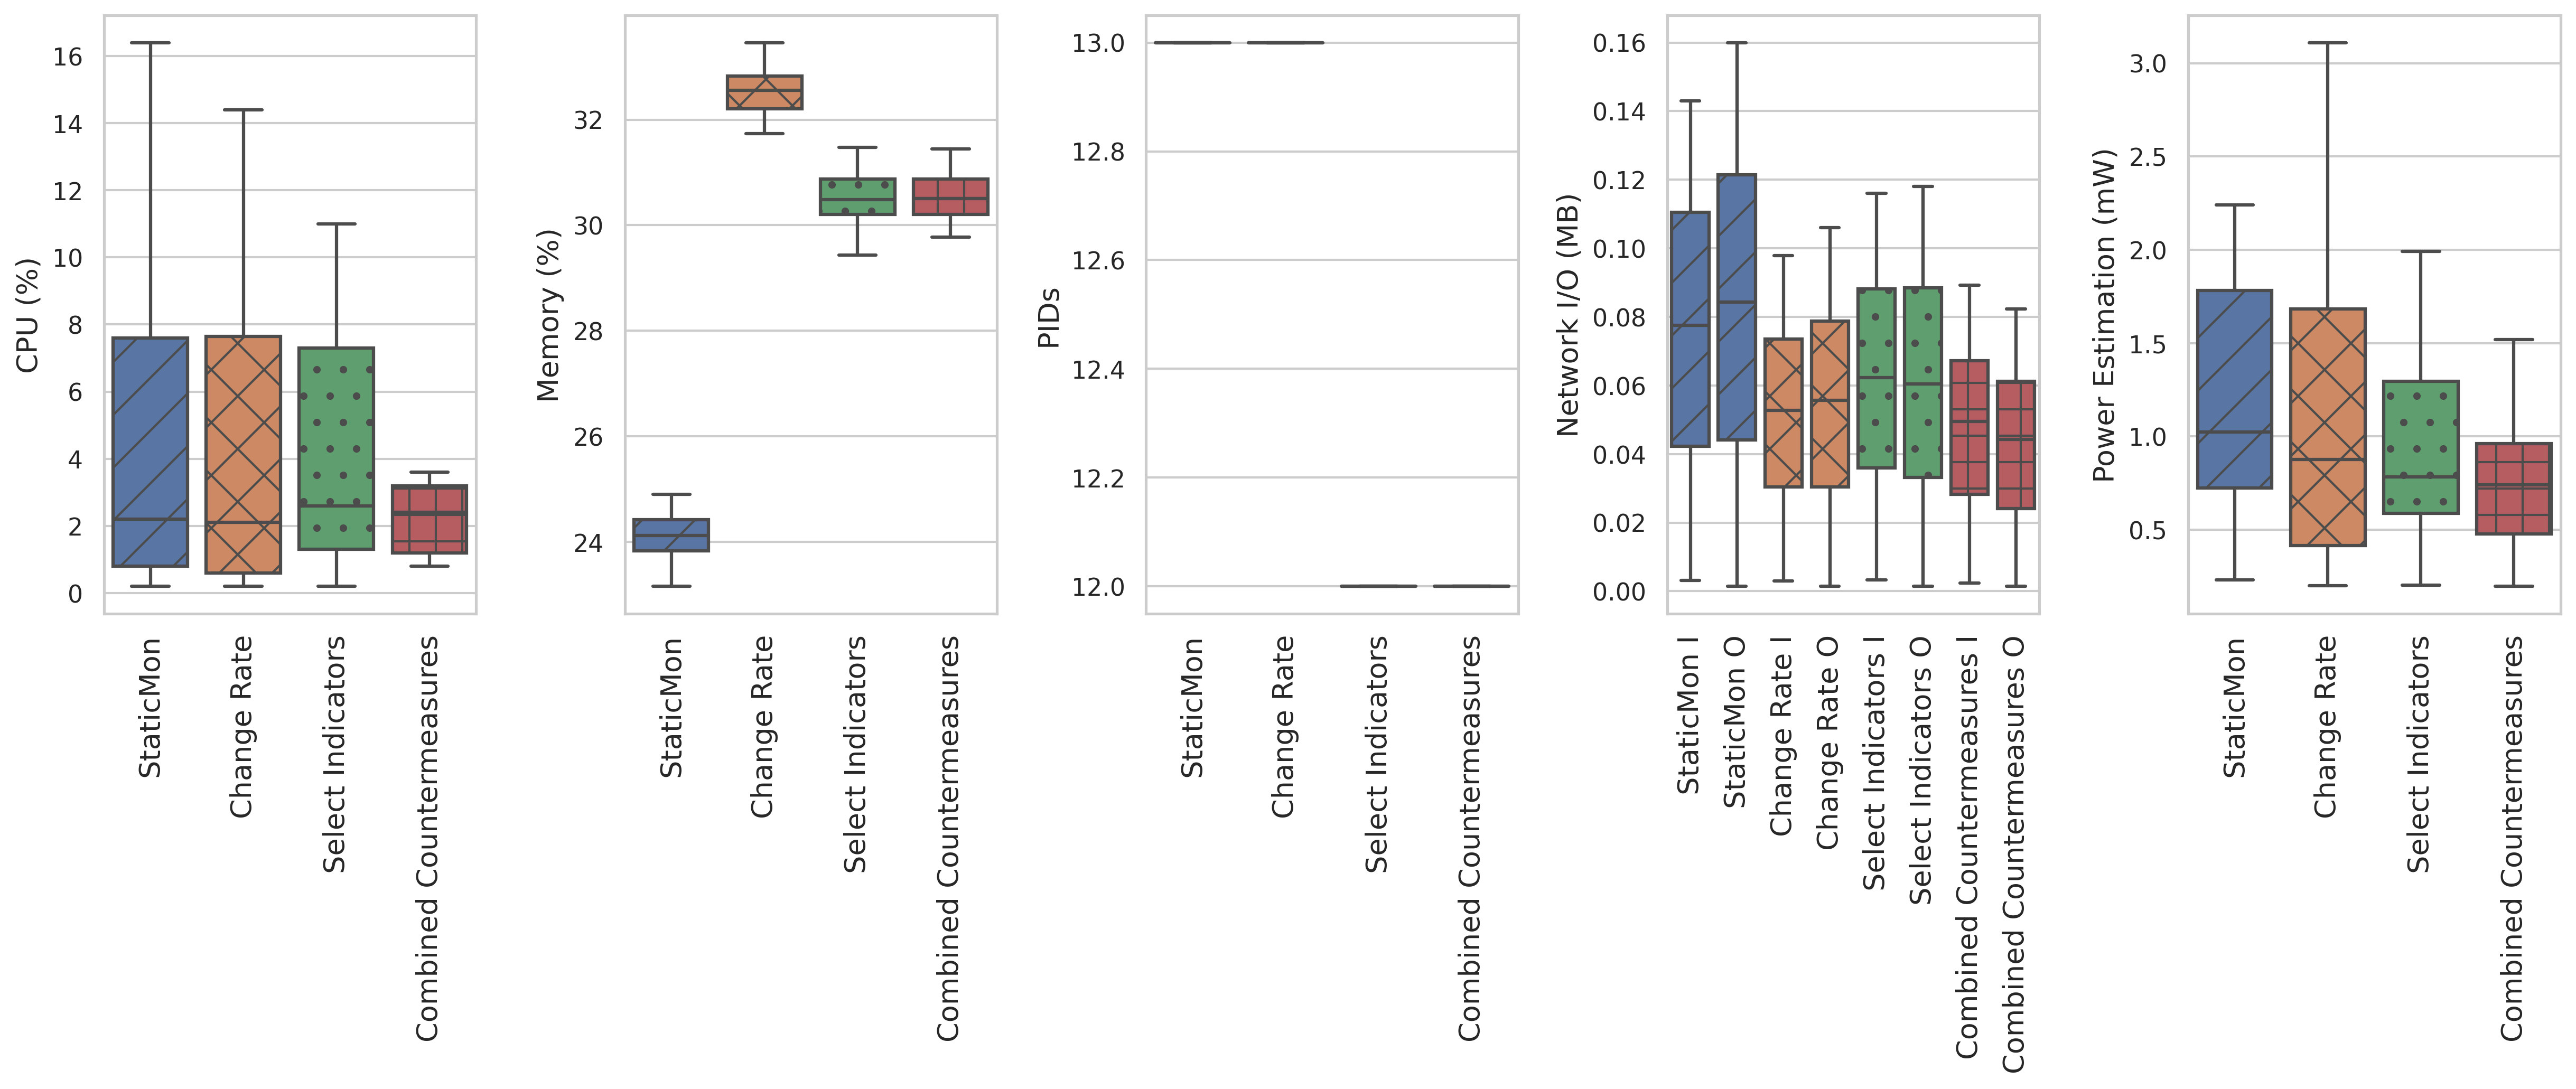

In [18]:
f = plt.figure(figsize=(20,5), dpi=300)

gs = gridspec.GridSpec(1, 5)

colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3]]
hatches = ['/', '\/', '.', '+']
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])

ax1.set_xticklabels(['StaticMon', 'Change Rate', 'Select Indicators', 'Combined Countermeasures'], rotation=90, fontsize=13)
ax1.set_ylabel('CPU (%)', fontsize=13)

ax2.set_ylabel('Memory (%)', fontsize=13)
ax2.set_xticklabels(['StaticMon', 'Change Rate', 'Select Indicators', 'Combined Countermeasures'], rotation=90, fontsize=13)

ax3.set_ylabel('PIDs', fontsize=13)
ax3.set_xticklabels(['StaticMon', 'Change Rate', 'Select Indicators', 'Combined Countermeasures'], rotation=90, fontsize=13)

ax4.set_ylabel('Network I/O (MB)', fontsize=13)
ax4.set_xticklabels(['StaticMon I', 'StaticMon O', 'Change Rate I', 'Change Rate O', 'Select Indicators I', 'Select Indicators O', 'Combined Countermeasures I', 'Combined Countermeasures O'], rotation=90, fontsize=13)

ax5.set_ylabel('Power Estimation (mW)', fontsize=13)
ax5.set_xticklabels(['StaticMon', 'Change Rate', 'Select Indicators', 'Combined Countermeasures'], rotation=90, fontsize=13)


sns.boxplot(data=df_cpu.mask(df_cpu == 0.0), ax=ax1, palette=colors, showfliers=False);
for i, bar in enumerate(ax1.artists):
    bar.set_hatch(hatches[i])
    
sns.boxplot(data=df_mem, ax=ax2, palette=colors, showfliers=False);
for i, bar in enumerate(ax2.artists):
    bar.set_hatch(hatches[i])

sns.boxplot(data=df_pids, ax=ax3, palette=colors, showfliers=False);

colors_net = [sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[2], sns.color_palette()[3], sns.color_palette()[3]]
sns.boxplot(data=df_netio, ax=ax4, palette=colors_net, showfliers=False);
i = 0
to = len(ax4.artists)

while i < to:
    hatch = hatches[i] if i == 0 else hatches[int(i / 2)]
    ax4.artists[i].set_hatch(hatch)
    i = i + 1

sns.boxplot(data=df_battery, ax=ax5, palette=colors, showfliers=False);
for i, bar in enumerate(ax5.artists):
    bar.set_hatch(hatches[i])

plt.subplots_adjust(wspace=0.4)
plt.savefig("graphs/Fullboxplot_Efficiency_wb_full.pdf",bbox_inches='tight')

<ipython-input-19-2c6864d5b08c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['StaticMon I', 'StaticMon O', 'Change Rate I', 'Change Rate O', 'Select Indicators I', 'Select Indicators O', 'Combined Countermeasures I', 'Combined Countermeasures O'], rotation=90, fontsize=13)


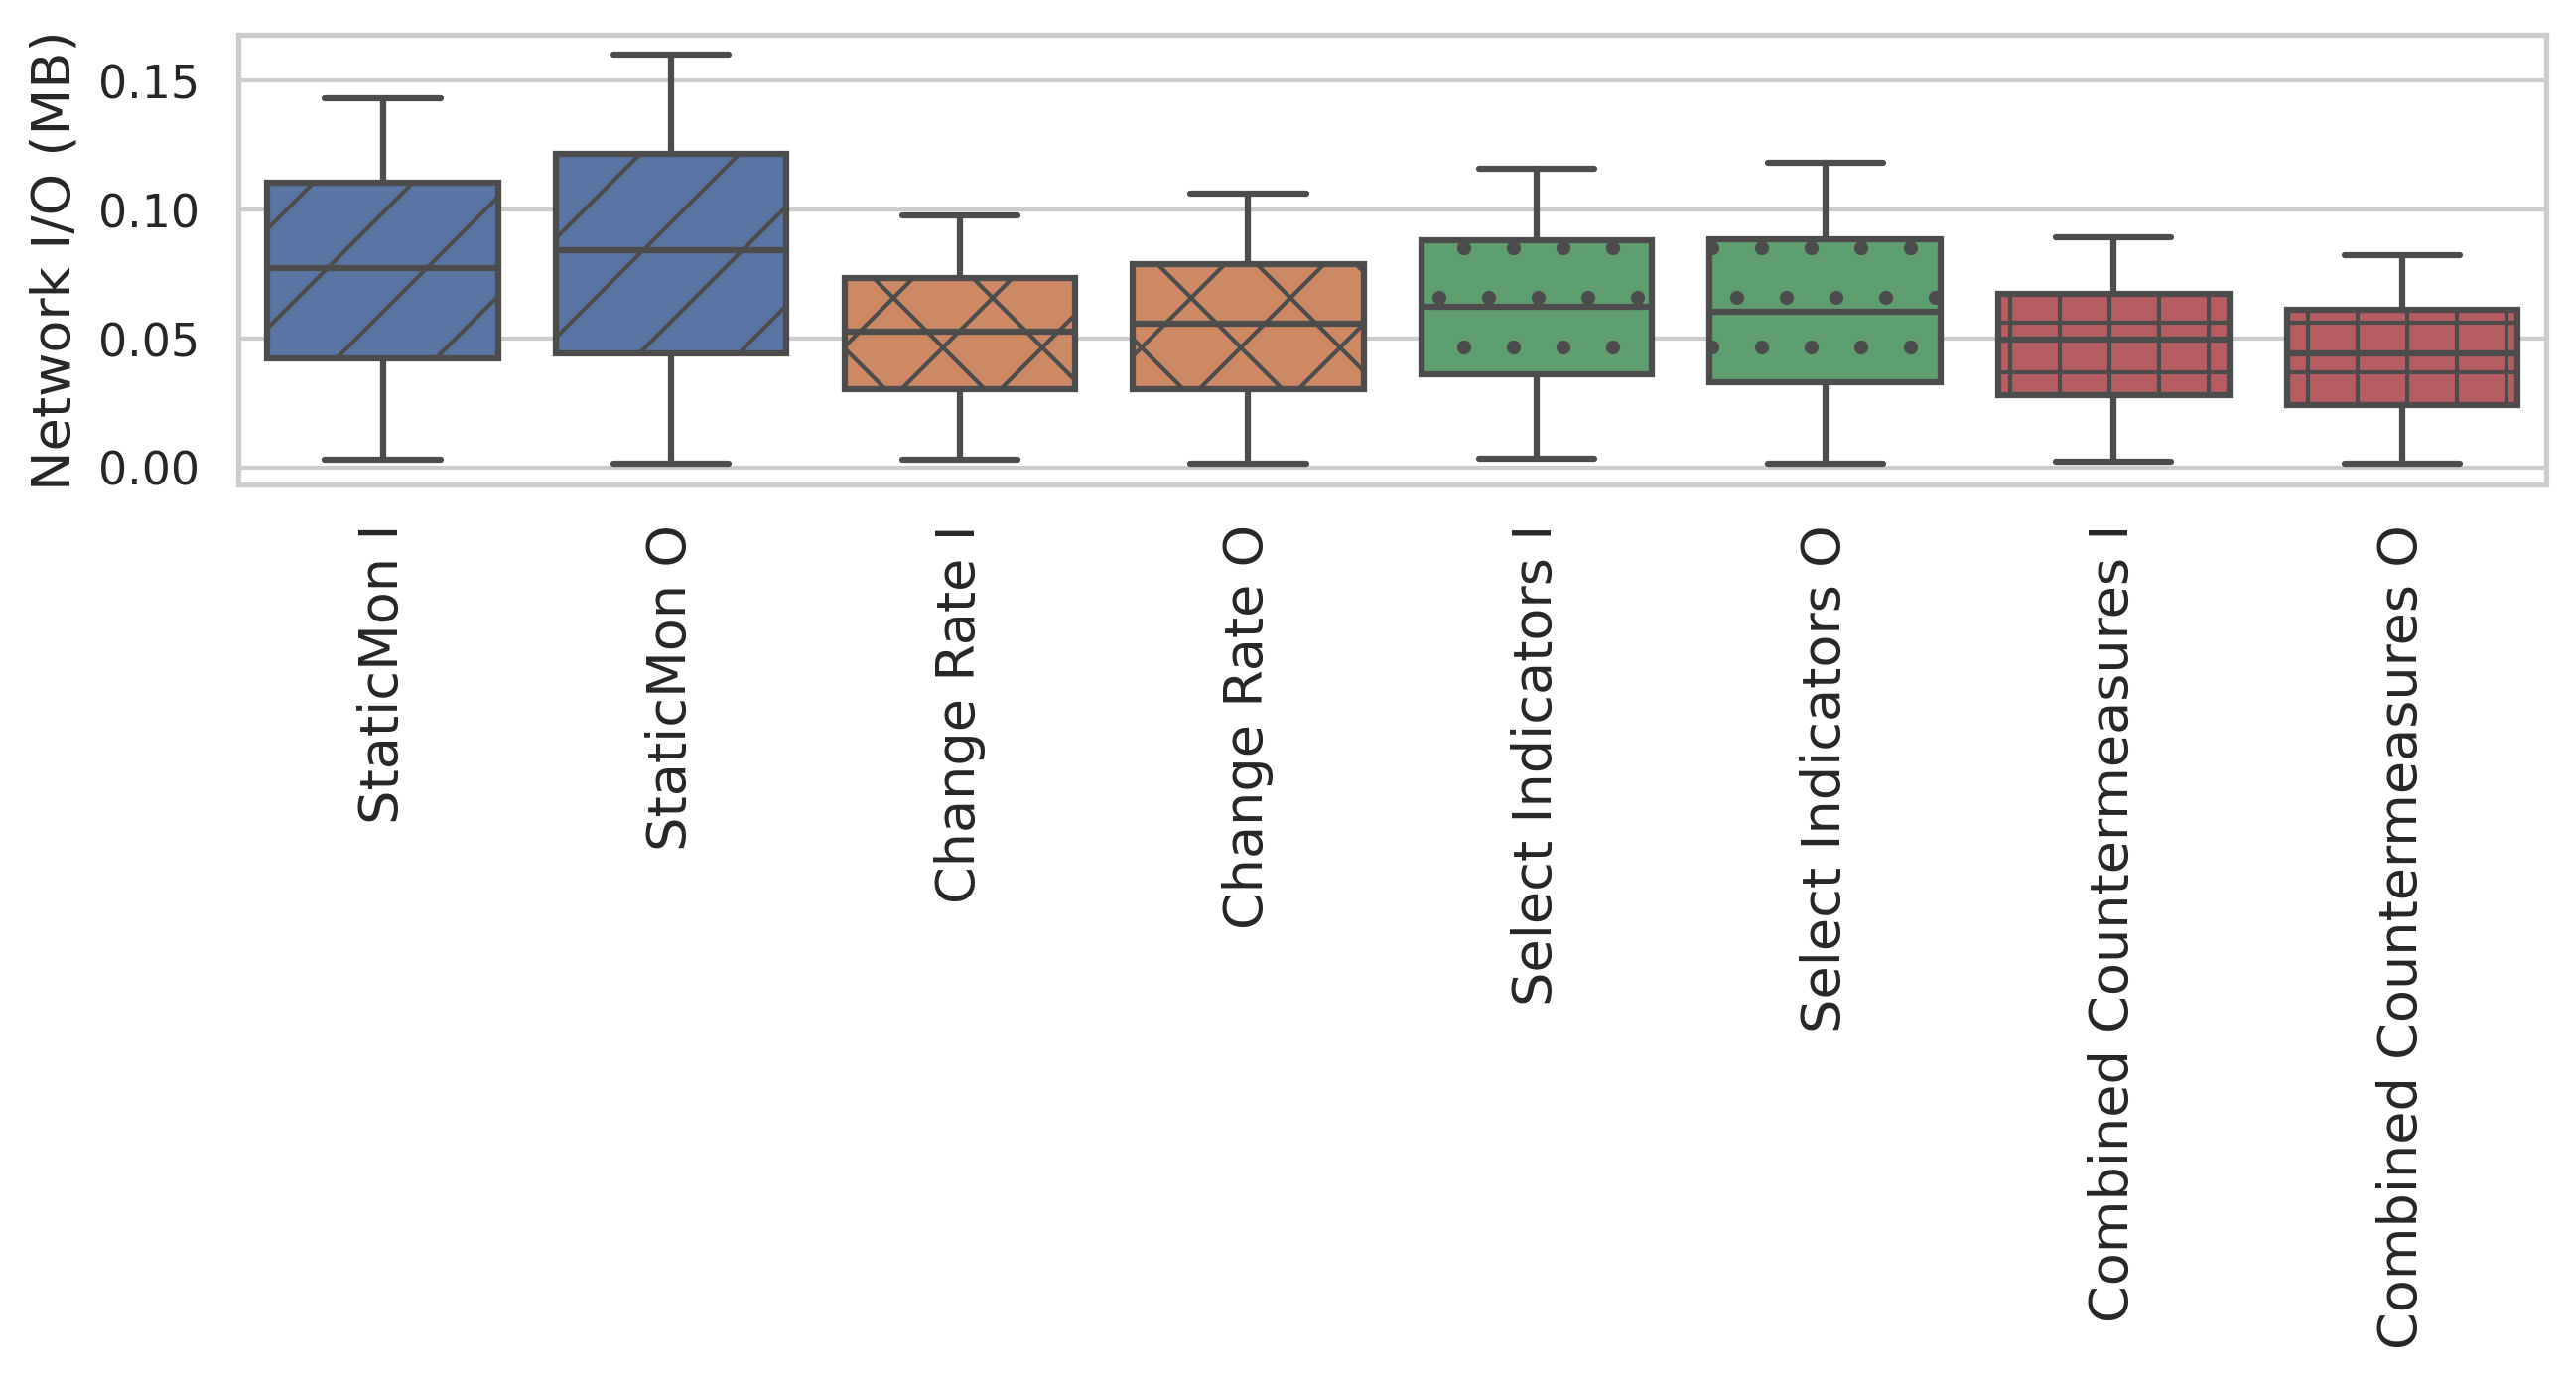

In [19]:
f = plt.figure(figsize=(10,2), dpi=300)

gs = gridspec.GridSpec(1, 1)

hatches = ['/', '\/', '.', '+']
              
ax1 = plt.subplot(gs[0])

ax1.set_ylabel('Network I/O (MB)', fontsize=13)
ax1.set_xticklabels(['StaticMon I', 'StaticMon O', 'Change Rate I', 'Change Rate O', 'Select Indicators I', 'Select Indicators O', 'Combined Countermeasures I', 'Combined Countermeasures O'], rotation=90, fontsize=13)

colors_net = [sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[2], sns.color_palette()[3], sns.color_palette()[3]]
sns.boxplot(data=df_netio, ax=ax1, palette=colors_net, showfliers=False);

i = 0
to = len(ax1.artists)

while i < to:
    hatch = hatches[i] if i == 0 else hatches[int(i / 2)]
    ax1.artists[i].set_hatch(hatch)
    i = i + 1

# plt.subplots_adjust(wspace=0.4)
plt.savefig("graphs/Fullboxplot_Efficiency_wb.pdf",bbox_inches='tight')

In [20]:
from scipy.stats import shapiro
from pprint import pprint
p_values = {
    "CPU (%)": {},
    "Memory (%)": {},
    "PIDs": {},
    "Network I (MB)": {},
    "Network O (MB)": {},
    "Power Estimation (mW)": {}
}

stats = {
    "CPU (%)": {},
    "Memory (%)": {},
    "PIDs": {},
    "Network I (MB)": {},
    "Network O (MB)": {},
    "Power Estimation (mW)": {}
}

df_cpu = df_cpu.dropna()
df_mem = df_mem.dropna()
df_pids = df_pids.dropna()
df_netio = df_netio.dropna()
df_battery = df_battery.dropna()

stats["CPU (%)"]["StaticMon"], p_values["CPU (%)"]["StaticMon"] = shapiro(df_cpu["StaticMon"][df_cpu["StaticMon"] != 0.0])
stats["CPU (%)"]["Change Rate"], p_values["CPU (%)"]["Change Rate"] = shapiro(df_cpu["Change Rate"][df_cpu["Change Rate"] != 0.0])
stats["CPU (%)"]["Select Indicators"], p_values["CPU (%)"]["Select Indicators"] = shapiro(df_cpu["Select Indicators"][df_cpu["Select Indicators"] != 0.0])
stats["CPU (%)"]["Combined Countermeasures"], p_values["CPU (%)"]["Combined Countermeasures"] = shapiro(df_cpu["Combined Countermeasures"][df_cpu["Combined Countermeasures"] != 0.0])

stats["Memory (%)"]["StaticMon"], p_values["Memory (%)"]["StaticMon"] = shapiro(df_mem["StaticMon"])
stats["Memory (%)"]["Change Rate"], p_values["Memory (%)"]["Change Rate"] = shapiro(df_mem["Change Rate"])
stats["Memory (%)"]["Select Indicators"], p_values["Memory (%)"]["Select Indicators"] = shapiro(df_mem["Select Indicators"])
stats["Memory (%)"]["Combined Countermeasures"], p_values["Memory (%)"]["Combined Countermeasures"] = shapiro(df_mem["Combined Countermeasures"])

stats["PIDs"]["StaticMon"], p_values["PIDs"]["StaticMon"] = shapiro(df_pids["StaticMon"])
stats["PIDs"]["Change Rate"], p_values["PIDs"]["Change Rate"] = shapiro(df_pids["Change Rate"])
stats["PIDs"]["Select Indicators"], p_values["PIDs"]["Select Indicators"] = shapiro(df_pids["Select Indicators"])
stats["PIDs"]["Combined Countermeasures"], p_values["PIDs"]["Combined Countermeasures"] = shapiro(df_pids["Combined Countermeasures"])

stats["Network I (MB)"]["StaticMon"], p_values["Network I (MB)"]["StaticMon"] = shapiro(df_netio["StaticMon I"])
stats["Network I (MB)"]["Change Rate"], p_values["Network I (MB)"]["Change Rate"] = shapiro(df_netio["Change Rate I"])
stats["Network I (MB)"]["Select Indicators"], p_values["Network I (MB)"]["Select Indicators"] = shapiro(df_netio["Select Indicators I"])
stats["Network I (MB)"]["Combined Countermeasures"], p_values["Network I (MB)"]["Combined Countermeasures"] = shapiro(df_netio["Combined Countermeasures I"])
stats["Network O (MB)"]["StaticMon"], p_values["Network O (MB)"]["StaticMon"] = shapiro(df_netio["StaticMon O"])
stats["Network O (MB)"]["Change Rate"], p_values["Network O (MB)"]["Change Rate"] = shapiro(df_netio["Change Rate O"])
stats["Network O (MB)"]["Select Indicators"], p_values["Network O (MB)"]["Select Indicators"] = shapiro(df_netio["Select Indicators O"])
stats["Network O (MB)"]["Combined Countermeasures"], p_values["Network O (MB)"]["Combined Countermeasures"] = shapiro(df_netio["Combined Countermeasures O"])

stats["Power Estimation (mW)"]["StaticMon"], p_values["Power Estimation (mW)"]["StaticMon"] = shapiro(df_battery["StaticMon"])
stats["Power Estimation (mW)"]["Change Rate"], p_values["Power Estimation (mW)"]["Change Rate"] = shapiro(df_battery["Change Rate"])
stats["Power Estimation (mW)"]["Select Indicators"], p_values["Power Estimation (mW)"]["Select Indicators"] = shapiro(df_battery["Select Indicators"])
stats["Power Estimation (mW)"]["Combined Countermeasures"], p_values["Power Estimation (mW)"]["Combined Countermeasures"] = shapiro(df_battery["Combined Countermeasures"])

pprint(p_values)

pprint(stats)

{'CPU (%)': {'Change Rate': 6.59419008286477e-09,
             'Combined Countermeasures': 7.314797585422639e-06,
             'Select Indicators': 6.445400657639766e-08,
             'StaticMon': 3.1281851702079713e-14},
 'Memory (%)': {'Change Rate': 5.942338398715236e-28,
                'Combined Countermeasures': 2.2705526130735813e-26,
                'Select Indicators': 1.1982543288666375e-29,
                'StaticMon': 5.418107369719701e-29},
 'Network I (MB)': {'Change Rate': 2.435758365837426e-11,
                    'Combined Countermeasures': 7.533700052686498e-11,
                    'Select Indicators': 4.4494564283015237e-11,
                    'StaticMon': 1.800119428518876e-11},
 'Network O (MB)': {'Change Rate': 1.5276233403249684e-11,
                    'Combined Countermeasures': 5.0684820923629914e-11,
                    'Select Indicators': 2.4767361772592977e-11,
                    'StaticMon': 1.561617328504905e-11},
 'PIDs': {'Change Rate': 1.02841294296

In [21]:
from scipy.stats import mannwhitneyu

p_values = {
    "CPU (%)": {},
    "Memory (%)": {},
    "PIDs": {},
    "Network I (MB)": {},
    "Network O (MB)": {},
    "Power Estimation (mW)": {}
}

stats = {
    "CPU (%)": {},
    "Memory (%)": {},
    "PIDs": {},
    "Network I (MB)": {},
    "Network O (MB)": {},
    "Power Estimation (mW)": {}
}

stats["CPU (%)"]["StaticMon - Change Rate"], p_values["CPU (%)"]["StaticMon - Change Rate"] = mannwhitneyu(df_cpu["StaticMon"][df_cpu["StaticMon"] != 0.0], df_cpu["Change Rate"][df_cpu["Change Rate"] != 0.0])
stats["CPU (%)"]["StaticMon - Select Indicators"], p_values["CPU (%)"]["StaticMon - Select Indicators"] = mannwhitneyu(df_cpu["StaticMon"][df_cpu["StaticMon"] != 0.0], df_cpu["Select Indicators"][df_cpu["Select Indicators"] != 0.0])
stats["CPU (%)"]["StaticMon - Combined Countermeasures"], p_values["CPU (%)"]["StaticMon - Combined Countermeasures"] = mannwhitneyu(df_cpu["StaticMon"][df_cpu["StaticMon"] != 0.0], df_cpu["Combined Countermeasures"][df_cpu["Combined Countermeasures"] != 0.0])
stats["CPU (%)"]["Change Rate - Combined Countermeasures"], p_values["CPU (%)"]["Change Rate - Combined Countermeasures"] = mannwhitneyu(df_cpu["Change Rate"][df_cpu["Change Rate"] != 0.0], df_cpu["Combined Countermeasures"][df_cpu["Combined Countermeasures"] != 0.0])
stats["CPU (%)"]["Select Indicators - Combined Countermeasures"], p_values["CPU (%)"]["Select Indicators - Combined Countermeasures"] = mannwhitneyu(df_cpu["Select Indicators"][df_cpu["Select Indicators"] != 0.0], df_cpu["Combined Countermeasures"][df_cpu["Combined Countermeasures"] != 0.0])

stats["Memory (%)"]["StaticMon - Change Rate"], p_values["Memory (%)"]["StaticMon - Change Rate"] = mannwhitneyu(df_mem["StaticMon"], df_mem["Change Rate"])
stats["Memory (%)"]["StaticMon - Select Indicators"], p_values["Memory (%)"]["StaticMon - Select Indicators"] = mannwhitneyu(df_mem["StaticMon"], df_mem["Select Indicators"])
stats["Memory (%)"]["StaticMon - Combined Countermeasures"], p_values["Memory (%)"]["StaticMon - Combined Countermeasures"] = mannwhitneyu(df_mem["StaticMon"], df_mem["Combined Countermeasures"])
stats["Memory (%)"]["Change Rate - Combined Countermeasures"], p_values["Memory (%)"]["Change Rate - Combined Countermeasures"] = mannwhitneyu(df_mem["Change Rate"], df_mem["Combined Countermeasures"])
stats["Memory (%)"]["Select Indicators - Combined Countermeasures"], p_values["Memory (%)"]["Select Indicators - Combined Countermeasures"] = mannwhitneyu(df_mem["Select Indicators"], df_mem["Combined Countermeasures"])

stats["PIDs"]["StaticMon - Change Rate"], p_values["PIDs"]["StaticMon - Change Rate"] = mannwhitneyu(df_pids["StaticMon"], df_pids["Change Rate"])
stats["PIDs"]["StaticMon - Select Indicators"], p_values["PIDs"]["StaticMon - Select Indicators"] = mannwhitneyu(df_pids["StaticMon"], df_pids["Select Indicators"])
stats["PIDs"]["StaticMon - Combined Countermeasures"], p_values["PIDs"]["StaticMon - Combined Countermeasures"] = mannwhitneyu(df_pids["StaticMon"], df_pids["Combined Countermeasures"])
stats["PIDs"]["Change Rate - Combined Countermeasures"], p_values["PIDs"]["Change Rate - Combined Countermeasures"] = mannwhitneyu(df_pids["Change Rate"], df_pids["Combined Countermeasures"])
stats["PIDs"]["Select Indicators - Combined Countermeasures"], p_values["PIDs"]["Select Indicators - Combined Countermeasures"] = mannwhitneyu(df_pids["Select Indicators"], df_pids["Combined Countermeasures"])

stats["Network I (MB)"]["StaticMon - Change Rate"], p_values["Network I (MB)"]["StaticMon - Change Rate"] = mannwhitneyu(df_netio["StaticMon I"], df_netio["Change Rate I"])
stats["Network I (MB)"]["StaticMon - Select Indicators"], p_values["Network I (MB)"]["StaticMon - Select Indicators"] = mannwhitneyu(df_netio["StaticMon I"], df_netio["Select Indicators I"])
stats["Network I (MB)"]["StaticMon - Combined Countermeasures"], p_values["Network I (MB)"]["StaticMon - Combined Countermeasures"] = mannwhitneyu(df_netio["StaticMon I"], df_netio["Combined Countermeasures I"])
stats["Network I (MB)"]["Change Rate - Combined Countermeasures"], p_values["Network I (MB)"]["Change Rate - Combined Countermeasures"] = mannwhitneyu(df_netio["Change Rate I"], df_netio["Combined Countermeasures I"])
stats["Network I (MB)"]["Select Indicators - Combined Countermeasures"], p_values["Network I (MB)"]["Select Indicators - Combined Countermeasures"] = mannwhitneyu(df_netio["Select Indicators I"], df_netio["Combined Countermeasures I"])

stats["Network O (MB)"]["StaticMon - Change Rate"], p_values["Network O (MB)"]["StaticMon - Change Rate"] = mannwhitneyu(df_netio["StaticMon O"], df_netio["Change Rate O"])
stats["Network O (MB)"]["StaticMon - Select Indicators"], p_values["Network O (MB)"]["StaticMon - Select Indicators"] = mannwhitneyu(df_netio["StaticMon O"], df_netio["Select Indicators O"])
stats["Network O (MB)"]["StaticMon - Combined Countermeasures"], p_values["Network O (MB)"]["StaticMon - Combined Countermeasures"] = mannwhitneyu(df_netio["StaticMon O"], df_netio["Combined Countermeasures O"])
stats["Network O (MB)"]["Change Rate - Combined Countermeasures"], p_values["Network O (MB)"]["Change Rate - Combined Countermeasures"] = mannwhitneyu(df_netio["Change Rate O"], df_netio["Combined Countermeasures O"])
stats["Network O (MB)"]["Select Indicators - Combined Countermeasures"], p_values["Network O (MB)"]["Select Indicators - Combined Countermeasures"] = mannwhitneyu(df_netio["Select Indicators O"], df_netio["Combined Countermeasures O"])

stats["Power Estimation (mW)"]["StaticMon - Change Rate"], p_values["Power Estimation (mW)"]["StaticMon - Change Rate"] = mannwhitneyu(df_battery["StaticMon"], df_battery["Change Rate"])
stats["Power Estimation (mW)"]["StaticMon - Select Indicators"], p_values["Power Estimation (mW)"]["StaticMon - Select Indicators"] = mannwhitneyu(df_battery["StaticMon"], df_battery["Select Indicators"])
stats["Power Estimation (mW)"]["StaticMon - Combined Countermeasures"], p_values["Power Estimation (mW)"]["StaticMon - Combined Countermeasures"] = mannwhitneyu(df_battery["StaticMon"], df_battery["Combined Countermeasures"])
stats["Power Estimation (mW)"]["Change Rate - Combined Countermeasures"], p_values["Power Estimation (mW)"]["Change Rate - Combined Countermeasures"] = mannwhitneyu(df_battery["Change Rate"], df_battery["Combined Countermeasures"])
stats["Power Estimation (mW)"]["Select Indicators - Combined Countermeasures"], p_values["Power Estimation (mW)"]["Select Indicators - Combined Countermeasures"] = mannwhitneyu(df_battery["Select Indicators"], df_battery["Combined Countermeasures"])

pprint(p_values)

pprint(stats)

{'CPU (%)': {'Change Rate - Combined Countermeasures': 0.33053475841095414,
             'Select Indicators - Combined Countermeasures': 0.31569435050030437,
             'StaticMon - Change Rate': 0.2650259201451679,
             'StaticMon - Combined Countermeasures': 0.3606371599419994,
             'StaticMon - Select Indicators': 0.29789100761636644},
 'Memory (%)': {'Change Rate - Combined Countermeasures': 7.782060116285356e-139,
                'Select Indicators - Combined Countermeasures': 0.3770435867265468,
                'StaticMon - Change Rate': 5.203633920930877e-169,
                'StaticMon - Combined Countermeasures': 4.156690374824025e-169,
                'StaticMon - Select Indicators': 4.254405127356675e-169},
 'Network I (MB)': {'Change Rate - Combined Countermeasures': 0.0043209306443146925,
                    'Select Indicators - Combined Countermeasures': 2.8726131533687706e-12,
                    'StaticMon - Change Rate': 2.414757140364327e-20,
       

In [22]:
effect_sizes = {
    "CPU (%)": {},
    "Memory (%)": {},
    "PIDs": {},
    "Network I (MB)": {},
    "Network O (MB)": {},
    "Power Estimation (mW)": {}
}

effect_sizes["CPU (%)"]["StaticMon - Change Rate"] = 1 - ((2*stats["CPU (%)"]["StaticMon - Change Rate"]) / (len(df_cpu["StaticMon"][df_cpu["StaticMon"] != 0.0]) * len(df_cpu["Change Rate"][df_cpu["Change Rate"] != 0.0])))
effect_sizes["CPU (%)"]["StaticMon - Select Indicators"] = 1 - ((2*stats["CPU (%)"]["StaticMon - Select Indicators"]) / (len(df_cpu["StaticMon"][df_cpu["StaticMon"] != 0.0]) * len(df_cpu["Select Indicators"][df_cpu["Select Indicators"] != 0.0])))
effect_sizes["CPU (%)"]["StaticMon - Combined Countermeasures"] = 1 - ((2*stats["CPU (%)"]["StaticMon - Combined Countermeasures"]) / (len(df_cpu["StaticMon"][df_cpu["StaticMon"] != 0.0]) * len(df_cpu["Combined Countermeasures"][df_cpu["Combined Countermeasures"] != 0.0])))
effect_sizes["CPU (%)"]["Change Rate - Combined Countermeasures"] = 1 - ((2*stats["CPU (%)"]["Change Rate - Combined Countermeasures"]) / (len(df_cpu["Change Rate"][df_cpu["Change Rate"] != 0.0]) * len(df_cpu["Combined Countermeasures"][df_cpu["Combined Countermeasures"] != 0.0])))
effect_sizes["CPU (%)"]["Select Indicators - Combined Countermeasures"] = 1 - ((2*stats["CPU (%)"]["Select Indicators - Combined Countermeasures"]) / (len(df_cpu["Select Indicators"][df_cpu["Select Indicators"] != 0.0]) * len(df_cpu["Combined Countermeasures"][df_cpu["Combined Countermeasures"] != 0.0])))

effect_sizes["Memory (%)"]["StaticMon - Change Rate"] = 1 - ((2*stats["Memory (%)"]["StaticMon - Change Rate"]) / (len(df_mem["StaticMon"]) * len(df_mem["Change Rate"])))
effect_sizes["Memory (%)"]["StaticMon - Select Indicators"] = 1 - ((2*stats["Memory (%)"]["StaticMon - Select Indicators"]) / (len(df_mem["StaticMon"]) * len(df_mem["Select Indicators"])))
effect_sizes["Memory (%)"]["StaticMon - Combined Countermeasures"] = 1 - ((2*stats["Memory (%)"]["StaticMon - Combined Countermeasures"]) / (len(df_mem["StaticMon"]) * len(df_mem["Combined Countermeasures"])))
effect_sizes["Memory (%)"]["Change Rate - Combined Countermeasures"] = 1 - ((2*stats["Memory (%)"]["Change Rate - Combined Countermeasures"]) / (len(df_mem["Change Rate"]) * len(df_mem["Combined Countermeasures"])))
effect_sizes["Memory (%)"]["Select Indicators - Combined Countermeasures"] = 1 - ((2*stats["Memory (%)"]["Select Indicators - Combined Countermeasures"]) / (len(df_mem["Select Indicators"]) * len(df_mem["Combined Countermeasures"])))

effect_sizes["PIDs"]["StaticMon - Change Rate"] = 1 - ((2*stats["PIDs"]["StaticMon - Change Rate"]) / (len(df_pids["StaticMon"]) * len(df_pids["Change Rate"])))
effect_sizes["PIDs"]["StaticMon - Select Indicators"] = 1 - ((2*stats["PIDs"]["StaticMon - Select Indicators"]) / (len(df_pids["StaticMon"]) * len(df_pids["Select Indicators"])))
effect_sizes["PIDs"]["StaticMon - Combined Countermeasures"] = 1 - ((2*stats["PIDs"]["StaticMon - Combined Countermeasures"]) / (len(df_pids["StaticMon"]) * len(df_pids["Combined Countermeasures"])))
effect_sizes["PIDs"]["Change Rate - Combined Countermeasures"] = 1 - ((2*stats["PIDs"]["Change Rate - Combined Countermeasures"]) / (len(df_pids["Change Rate"]) * len(df_pids["Combined Countermeasures"])))
effect_sizes["PIDs"]["Select Indicators - Combined Countermeasures"] = 1 - ((2*stats["PIDs"]["Select Indicators - Combined Countermeasures"]) / (len(df_pids["Select Indicators"]) * len(df_pids["Combined Countermeasures"])))

effect_sizes["Network I (MB)"]["StaticMon - Change Rate"] = 1 - ((2*stats["Network I (MB)"]["StaticMon - Change Rate"]) / (len(df_netio["StaticMon I"]) * len(df_netio["Change Rate I"])))
effect_sizes["Network I (MB)"]["StaticMon - Select Indicators"] = 1 - ((2*stats["Network I (MB)"]["StaticMon - Select Indicators"]) / (len(df_netio["StaticMon I"]) * len(df_netio["Select Indicators I"])))
effect_sizes["Network I (MB)"]["StaticMon - Combined Countermeasures"] = 1 - ((2*stats["Network I (MB)"]["StaticMon - Combined Countermeasures"]) / (len(df_netio["StaticMon I"]) * len(df_netio["Combined Countermeasures I"])))
effect_sizes["Network I (MB)"]["Change Rate - Combined Countermeasures"] = 1 - ((2*stats["Network I (MB)"]["Change Rate - Combined Countermeasures"]) / (len(df_netio["Change Rate I"]) * len(df_netio["Combined Countermeasures I"])))
effect_sizes["Network I (MB)"]["Select Indicators - Combined Countermeasures"] = 1 - ((2*stats["Network I (MB)"]["Select Indicators - Combined Countermeasures"]) / (len(df_netio["Select Indicators I"]) * len(df_netio["Combined Countermeasures I"])))


effect_sizes["Network O (MB)"]["StaticMon - Change Rate"] = 1 - ((2*stats["Network O (MB)"]["StaticMon - Change Rate"]) / (len(df_netio["StaticMon O"]) * len(df_netio["Change Rate O"])))
effect_sizes["Network O (MB)"]["StaticMon - Select Indicators"] = 1 - ((2*stats["Network O (MB)"]["StaticMon - Select Indicators"]) / (len(df_netio["StaticMon O"]) * len(df_netio["Select Indicators O"])))
effect_sizes["Network O (MB)"]["StaticMon - Combined Countermeasures"] = 1 - ((2*stats["Network O (MB)"]["StaticMon - Combined Countermeasures"]) / (len(df_netio["StaticMon O"]) * len(df_netio["Combined Countermeasures O"])))
effect_sizes["Network O (MB)"]["Change Rate - Combined Countermeasures"] = 1 - ((2*stats["Network O (MB)"]["Change Rate - Combined Countermeasures"]) / (len(df_netio["Change Rate O"]) * len(df_netio["Combined Countermeasures O"])))
effect_sizes["Network O (MB)"]["Select Indicators - Combined Countermeasures"] = 1 - ((2*stats["Network O (MB)"]["Select Indicators - Combined Countermeasures"]) / (len(df_netio["Select Indicators O"]) * len(df_netio["Combined Countermeasures O"])))


effect_sizes["Power Estimation (mW)"]["StaticMon - Change Rate"] = 1 - ((2*stats["Power Estimation (mW)"]["StaticMon - Change Rate"]) / (len(df_battery["StaticMon"]) * len(df_battery["Change Rate"])))
effect_sizes["Power Estimation (mW)"]["StaticMon - Select Indicators"] = 1 - ((2*stats["Power Estimation (mW)"]["StaticMon - Select Indicators"]) / (len(df_battery["StaticMon"]) * len(df_battery["Select Indicators"])))
effect_sizes["Power Estimation (mW)"]["StaticMon - Combined Countermeasures"] = 1 - ((2*stats["Power Estimation (mW)"]["StaticMon - Combined Countermeasures"]) / (len(df_battery["StaticMon"]) * len(df_battery["Combined Countermeasures"])))
effect_sizes["Power Estimation (mW)"]["Change Rate - Combined Countermeasures"] = 1 - ((2*stats["Power Estimation (mW)"]["Change Rate - Combined Countermeasures"]) / (len(df_battery["Change Rate"]) * len(df_battery["Combined Countermeasures"])))
effect_sizes["Power Estimation (mW)"]["Select Indicators - Combined Countermeasures"] = 1 - ((2*stats["Power Estimation (mW)"]["Select Indicators - Combined Countermeasures"]) / (len(df_battery["Select Indicators"]) * len(df_battery["Combined Countermeasures"])))


pprint(effect_sizes)

{'CPU (%)': {'Change Rate - Combined Countermeasures': 0.058045977011494276,
             'Select Indicators - Combined Countermeasures': 0.07093596059113305,
             'StaticMon - Change Rate': 0.05880503144654092,
             'StaticMon - Combined Countermeasures': 0.04359141184124915,
             'StaticMon - Select Indicators': 0.06010781671159027},
 'Memory (%)': {'Change Rate - Combined Countermeasures': 0.9044036865234375,
                'Select Indicators - Combined Countermeasures': 0.011310577392578125,
                'StaticMon - Change Rate': 0.9994125366210938,
                'StaticMon - Combined Countermeasures': 0.9997024536132812,
                'StaticMon - Select Indicators': 0.9997024536132812},
 'Network I (MB)': {'Change Rate - Combined Countermeasures': 0.0948028564453125,
                    'Select Indicators - Combined Countermeasures': 0.24859237670898438,
                    'StaticMon - Change Rate': 0.3309745788574219,
                    'Static